In [33]:
!pip install obspy

In [34]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd

# Function to get earthquake data for a specific time range
def get_earthquake_data(start_time, end_time):
    client = Client("USGS")
    catalog = client.get_events(starttime=start_time, endtime=end_time, minmagnitude=5.0)
    return catalog

# Function to extract place information from event descriptions
def get_place(event):
    if event.event_descriptions:
        return event.event_descriptions[0].text
    else:
        return ""

# Define the total time range (100 years)
start_date = UTCDateTime("1900-01-01")
end_date = UTCDateTime("2024-01-01")

# Divide the time range into 20 parts
num_segments = 25
segment_duration = (end_date - start_date) / num_segments

# Initialize an empty DataFrame to store the collected earthquake data
all_earthquakes = pd.DataFrame()

# Loop through each segment and retrieve earthquake data
for i in range(num_segments):
    segment_start = start_date + i * segment_duration
    segment_end = segment_start + segment_duration

    print(f"Fetching data for segment {i + 1} - {segment_start} to {segment_end}")

    # Get earthquake data for the current segment
    segment_data = get_earthquake_data(segment_start, segment_end)

    # Extract relevant information and append to the DataFrame
    segment_df = pd.DataFrame({
        'Date': [event.origins[0].time.datetime for event in segment_data],
        'Latitude': [event.origins[0].latitude for event in segment_data],
        'Longitude': [event.origins[0].longitude for event in segment_data],
        'Depth': [event.origins[0].depth / 1000.0 if event.origins[0].depth is not None else None for event in segment_data],
        'Magnitude': [event.magnitudes[0].mag for event in segment_data],
        'place': [get_place(event) for event in segment_data]
    })

    all_earthquakes = pd.concat([all_earthquakes, segment_df], ignore_index=True)


Fetching data for segment 1 - 1900-01-01T00:00:00.000000Z to 1904-12-17T14:24:00.000000Z
Fetching data for segment 2 - 1904-12-17T14:24:00.000000Z to 1909-12-03T04:48:00.000000Z
Fetching data for segment 3 - 1909-12-03T04:48:00.000000Z to 1914-11-18T19:12:00.000000Z
Fetching data for segment 4 - 1914-11-18T19:12:00.000000Z to 1919-11-04T09:36:00.000000Z
Fetching data for segment 5 - 1919-11-04T09:36:00.000000Z to 1924-10-20T00:00:00.000000Z
Fetching data for segment 6 - 1924-10-20T00:00:00.000000Z to 1929-10-05T14:24:00.000000Z
Fetching data for segment 7 - 1929-10-05T14:24:00.000000Z to 1934-09-21T04:48:00.000000Z
Fetching data for segment 8 - 1934-09-21T04:48:00.000000Z to 1939-09-06T19:12:00.000000Z
Fetching data for segment 9 - 1939-09-06T19:12:00.000000Z to 1944-08-22T09:36:00.000000Z
Fetching data for segment 10 - 1944-08-22T09:36:00.000000Z to 1949-08-08T00:00:00.000000Z
Fetching data for segment 11 - 1949-08-08T00:00:00.000000Z to 1954-07-24T14:24:00.000000Z
Fetching data for s

In [35]:
earthquake_df=all_earthquakes.copy()

In [36]:
earthquake_df.head()

,Date,Latitude,Longitude,Depth,Magnitude,place
0,1904-12-11 17:05:42.720,-32.312,-73.706,10.0,6.72,"210 km WNW of Valparaíso, Chile"
1,1904-12-02 02:19:12.800,5.384,-80.533,15.0,6.49,"208 km S of Cambutal, Panama"
2,1904-08-30 11:43:20.850,30.684,100.608,15.0,7.09,"150 km WNW of Kangding, China"
3,1904-08-27 21:56:00.000,64.660,-148.080,NaN,7.30,"21 km S of Ester, Alaska"
4,1904-06-25 21:00:38.720,52.763,160.277,30.0,7.70,"115 km ESE of Petropavlovsk-Kamchatsky, Russia"


DEBUG:cmdstanpy:input tempfile: /tmp/tmpusblwxhl/pwcfpm8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpusblwxhl/n3mmgjcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96929', 'data', 'file=/tmp/tmpusblwxhl/pwcfpm8o.json', 'init=/tmp/tmpusblwxhl/n3mmgjcs.json', 'output', 'file=/tmp/tmpusblwxhl/prophet_modellanjvfo1/prophet_model-20231213004930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:49:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:49:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


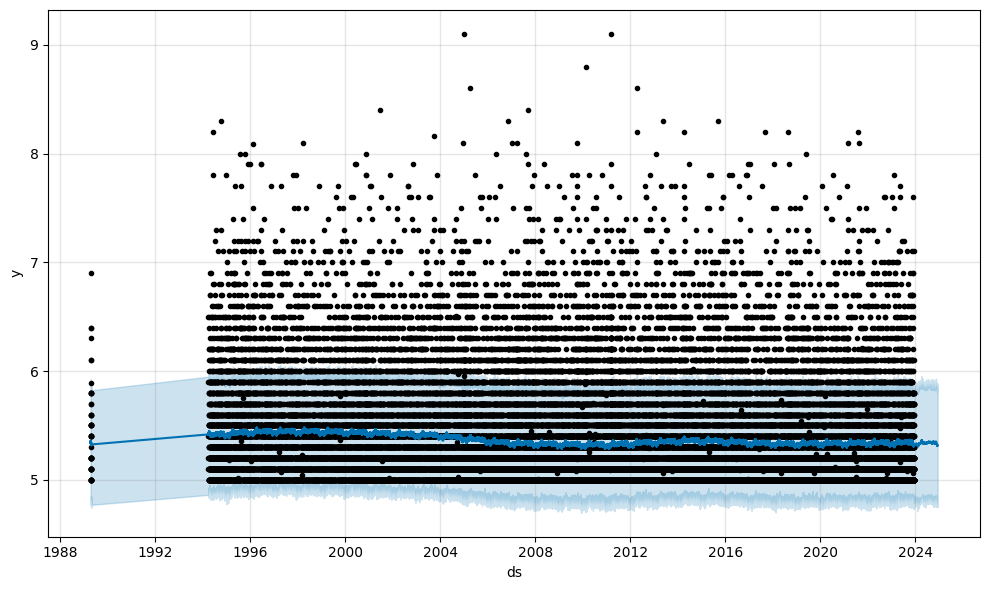

In [37]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming 'earthquake_df' is your DataFrame with 'Date' and 'Magnitude' columns
# You might need to preprocess the data further based on your specific requirements

# Select relevant columns and rename them as required by Prophet
data = earthquake_df[['Date', 'Magnitude']].rename(columns={'Date': 'ds', 'Magnitude': 'y'})
ddata = data.iloc[50000:-1]
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(ddata)

# Create a future DataFrame for predictions
future = model.make_future_dataframe(periods=365)  # You can adjust the 'periods' parameter based on your needs

# Generate predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.show()


In [38]:
earthquake_df = earthquake_df.drop_duplicates()

In [39]:
earthquake_df.tail(5)

,Date,Latitude,Longitude,Depth,Magnitude,place
100463,2019-01-16 04:12:35.310,-21.7795,169.0165,10.00,5.3,southeast of the Loyalty Islands
100464,2019-01-16 01:51:01.130,-22.0616,169.4063,10.00,5.1,"167 km ESE of Tadine, New Caledonia"
100465,2019-01-15 20:24:08.530,-8.9422,-79.0533,57.59,5.2,"44 km W of Puerto Santa, Peru"
100466,2019-01-15 20:03:20.260,5.8113,126.8985,61.83,5.7,"100 km SE of Pondaguitan, Philippines"
100467,2019-01-15 18:06:34.300,-13.3360,166.8752,35.00,6.6,"94 km NW of Sola, Vanuatu"


In [40]:
ddata = earthquake_df.iloc[40000:-1]

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from datetime import datetime, timedelta

# Load your earthquake dataset (replace 'your_dataset.csv' with the actual file path)
df = ddata.iloc[30000:-1]

# Assume the 'Date' column is in datetime format, if not, convert it
df['Date'] = pd.to_datetime(df['Date'])

# Define the features (X) and targets (y)
features = ['Magnitude', 'Latitude', 'Longitude', 'Depth']
target_location = ['Latitude', 'Longitude']
target_magnitude = 'Magnitude'

X = df[features]
y_location = df[target_location]
y_magnitude = df[target_magnitude]

# Split the data into training and testing sets
X_train, X_test, y_location_train, y_location_test, y_magnitude_train, y_magnitude_test = train_test_split(
    X, y_location, y_magnitude, test_size=0.2, random_state=42
)

# Create a pipeline with standard scaling and linear regression
model_location = make_pipeline(StandardScaler(), LinearRegression())
model_magnitude = LinearRegression()

# Train the models
model_location.fit(X_train, y_location_train)
model_magnitude.fit(X_train, y_magnitude_train)

# Make predictions on the test set
predictions_location = model_location.predict(X_test)
predictions_magnitude = model_magnitude.predict(X_test)

# Evaluate the models (you may use different metrics depending on your goals)
mse_location = mean_squared_error(y_location_test, predictions_location)
mse_magnitude = mean_squared_error(y_magnitude_test, predictions_magnitude)

print(f'Mean Squared Error for Location: {mse_location}')
print(f'Mean Squared Error for Magnitude: {mse_magnitude}')

# Now, you can use these models to make predictions for future earthquakes
# Specify 'n' as the number of days into the future
n = 30  # For example, predict earthquakes in the next 30 days

# Create a new DataFrame with future dates
future_dates = pd.date_range(start=df['Date'].max(), periods=n+1, freq='D')[1:]  # Exclude the current date
future_df = pd.DataFrame(index=future_dates, columns=features)

# Fill in the features (you may need to define reasonable values)
future_df['Magnitude'] = 5.0
future_df['Latitude'] = 0.0
future_df['Longitude'] = 0.0
future_df['Depth'] = 10.0

# Predict future earthquake locations and magnitudes
future_predictions_location = model_location.predict(future_df)
future_predictions_magnitude = model_magnitude.predict(future_df)

print('\nPredictions for Future Earthquakes:')
print('Predicted Locations:')
print(future_predictions_location)
print('\nPredicted Magnitudes:')
print(future_predictions_magnitude)



Mean Squared Error for Location: 4.282128452915182e-27
Mean Squared Error for Magnitude: 3.8478493522351013e-31

Predictions for Future Earthquakes:
Predicted Locations:
[[9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.99200722e-15 2.13162821e-14]
 [9.9

<ipython-input-41-85741cd87ba4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [42]:
from sklearn.tree import DecisionTreeRegressor

# Create a pipeline with standard scaling and decision tree regression
model_location = make_pipeline(StandardScaler(), DecisionTreeRegressor())
model_magnitude = DecisionTreeRegressor()

# Train the models
model_location.fit(X_train, y_location_train)
model_magnitude.fit(X_train, y_magnitude_train)

# Make predictions on the test set
predictions_location = model_location.predict(X_test)
predictions_magnitude = model_magnitude.predict(X_test)

# Evaluate the models
mse_location = mean_squared_error(y_location_test, predictions_location)
mse_magnitude = mean_squared_error(y_magnitude_test, predictions_magnitude)

print(f'Mean Squared Error for Location: {mse_location}')
print(f'Mean Squared Error for Magnitude: {mse_magnitude}')


Mean Squared Error for Location: 0.5835191501131973
Mean Squared Error for Magnitude: 7.122927950106919e-06


In [43]:
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline with standard scaling and random forest regression
model_location = make_pipeline(StandardScaler(), RandomForestRegressor())
model_magnitude = RandomForestRegressor()

# Train the models
model_location.fit(X_train, y_location_train)
model_magnitude.fit(X_train, y_magnitude_train)

# Make predictions on the test set
predictions_location = model_location.predict(X_test)
predictions_magnitude = model_magnitude.predict(X_test)

# Evaluate the models
mse_location = mean_squared_error(y_location_test, predictions_location)
mse_magnitude = mean_squared_error(y_magnitude_test, predictions_magnitude)

print(f'Mean Squared Error for Location: {mse_location}')
print(f'Mean Squared Error for Magnitude: {mse_magnitude}')


Mean Squared Error for Location: 0.4050187219084447
Mean Squared Error for Magnitude: 1.602305760708981e-05


In [44]:
df = earthquake_df.iloc[50000:-1]

In [45]:
df["Area"] = df['Latitude'].astype(str) + ', ' + df['Longitude'].astype(str)

<ipython-input-45-3434d3a275eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Area"] = df['Latitude'].astype(str) + ', ' + df['Longitude'].astype(str)


Mean Squared Error for Location: 0.1128662183010255
Mean Squared Error for Magnitude: 3.004846720413654e-06


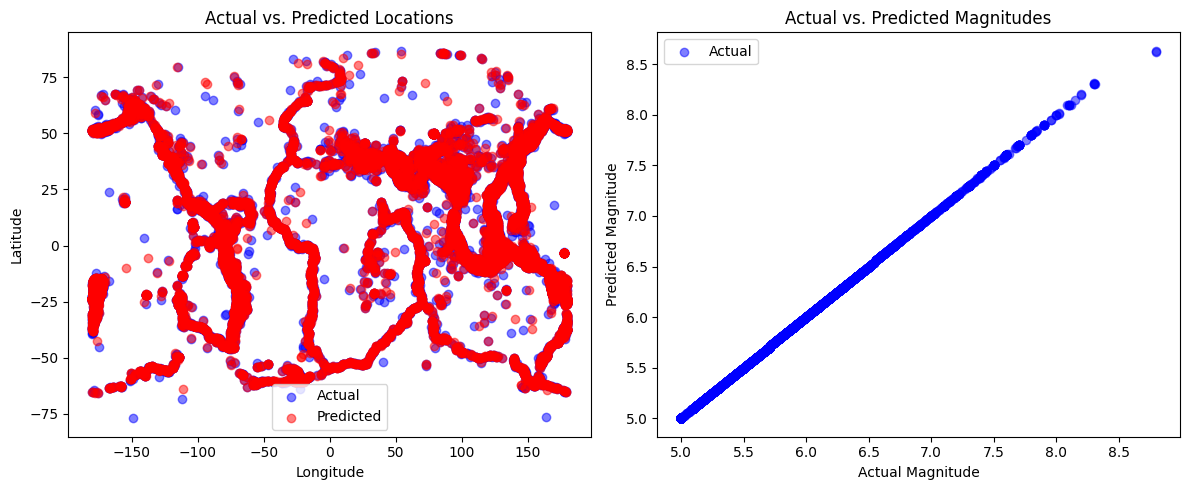

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


earthquake_df['Date'] = pd.to_datetime(earthquake_df['Date'])

# Define the features (X) and targets (y)
features = ['Magnitude', 'Latitude', 'Longitude']
target_location = ['Latitude', 'Longitude']
target_magnitude = 'Magnitude'

X = earthquake_df[features]
y_location = earthquake_df[target_location]
y_magnitude = earthquake_df[target_magnitude]

# Split the data into training and testing sets
X_train, X_test, y_location_train, y_location_test, y_magnitude_train, y_magnitude_test = train_test_split(
    X, y_location, y_magnitude, test_size=0.2, random_state=42
)

# Create pipelines with standard scaling and random forest regression
model_location = make_pipeline(StandardScaler(), RandomForestRegressor())
model_magnitude = RandomForestRegressor()

# Train the models
model_location.fit(X_train, y_location_train)
model_magnitude.fit(X_train, y_magnitude_train)

# Make predictions on the test set
predictions_location = model_location.predict(X_test)
predictions_magnitude = model_magnitude.predict(X_test)

# Evaluate the models
mse_location = mean_squared_error(y_location_test, predictions_location)
mse_magnitude = mean_squared_error(y_magnitude_test, predictions_magnitude)

print(f'Mean Squared Error for Location: {mse_location}')
print(f'Mean Squared Error for Magnitude: {mse_magnitude}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_location_test['Longitude'], y_location_test['Latitude'], color='blue', label='Actual', alpha=0.5)
plt.scatter(predictions_location[:, 1], predictions_location[:, 0], color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Visualize actual vs. predicted values for magnitude
plt.subplot(1, 2, 2)
plt.scatter(y_magnitude_test, predictions_magnitude, color='blue', label='Actual', alpha=0.5)
plt.title('Actual vs. Predicted Magnitudes')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

earthquake_df['Date'] = pd.to_datetime(earthquake_df['Date'])

# Define the features (X) and target (y)
features = ['Magnitude', 'Latitude', 'Longitude']
target = 'Earthquake'  # Binary column indicating whether an earthquake occurred or not

# Define the latitude and longitude ranges for your selected area
min_latitude = 30.0
max_latitude = 40.0
min_longitude = -120.0
max_longitude = -110.0

# Create a mask for the selected area
mask = (
    (earthquake_df['Latitude'] >= min_latitude) & (earthquake_df['Latitude'] <= max_latitude) &
    (earthquake_df['Longitude'] >= min_longitude) & (earthquake_df['Longitude'] <= max_longitude)
)

# Filter the dataset based on the mask
selected_area_df = earthquake_df[mask].copy()

# Convert the 'Magnitude' column to a binary column indicating whether an earthquake occurred (1) or not (0)
selected_area_df['Earthquake'] = selected_area_df['Magnitude'].apply(lambda x: 1 if x >= 6.5 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    selected_area_df[features], selected_area_df[target], test_size=0.2, random_state=42
)

# Create a pipeline with standard scaling and random forest classification
#model_classifier = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=50))
from sklearn.linear_model import LogisticRegression

# Example: Use Logistic Regression with L1 regularization
model_classifier = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear'))

# Train the model
model_classifier.fit(X_train, y_train)

# Make predictions on the test set
probabilities = model_classifier.predict_proba(X_test)
predicted_magnitudes = model_classifier.predict(X_test)

# Extract probabilities for class 1 (Earthquake) and magnitudes
probabilities_earthquake = probabilities[:, 1] if probabilities.shape[1] == 2 else probabilities[:, 0]
mean_predicted_magnitude = predicted_magnitudes.mean()
std_predicted_magnitude = predicted_magnitudes.std()

# Evaluate the model (you can still use accuracy or other classification metrics)
accuracy = accuracy_score(y_test, predicted_magnitudes)
classification_report_str = classification_report(y_test, predicted_magnitudes)

print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report_str)

# Additional metrics
print('\nMean Probability of Earthquake Occurring:', probabilities_earthquake.mean())
print('Mean Predicted Magnitude:', mean_predicted_magnitude)
print('Standard Deviation of Predicted Magnitude:', std_predicted_magnitude)

from sklearn.model_selection import cross_val_score

# Replace the train-test split with cross-validation
scores = cross_val_score(model_classifier, selected_area_df[features], selected_area_df[target], cv=5)
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))


Accuracy: 0.9923664122137404

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.89      0.94         9

    accuracy                           0.99       131
   macro avg       1.00      0.94      0.97       131
weighted avg       0.99      0.99      0.99       131


Mean Probability of Earthquake Occurring: 0.06720299106888084
Mean Predicted Magnitude: 0.061068702290076333
Standard Deviation of Predicted Magnitude: 0.23945629223447515
Cross-Validation Accuracy: 1.00 (+/- 0.01)


In [48]:
import pickle

# Save the model to a file
with open('model_classifier.pkl', 'wb') as file:
    pickle.dump(model_classifier, file)

In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium import plugins


df['Date'] = pd.to_datetime(df['Date'])

# Filter earthquakes above a given magnitude
magnitude_threshold = 6.5
selected_earthquakes = df[df['Magnitude'] > magnitude_threshold]

# Feature engineering: Create a DaysSinceStart column
selected_earthquakes['DaysSinceStart'] = (selected_earthquakes['Date'] - selected_earthquakes['Date'].min()).dt.days

# Define features and target variable
features = ['DaysSinceStart', 'Latitude', 'Longitude']
target = 'Magnitude'

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(selected_earthquakes[features], selected_earthquakes[target])

# Specify the number of days into the future for prediction
n_days = 1  # Adjust as needed

# Create a DataFrame for future predictions
future_dates = pd.date_range(selected_earthquakes['Date'].max() + pd.DateOffset(1), periods=n_days, freq='D')
future_data = pd.DataFrame({
    'DaysSinceStart': (future_dates - selected_earthquakes['Date'].min()).days,
    'Latitude': np.random.uniform(low=-90, high=90, size=n_days),  # Example random latitude
    'Longitude': np.random.uniform(low=-180, high=180, size=n_days)  # Example random longitude
})

# Predict future earthquake magnitudes
future_data['Magnitude'] = rf_model.predict(future_data[features])

# Create a GeoDataFrame for plotting on a map
geometry = [Point(lon, lat) for lon, lat in zip(future_data['Longitude'], future_data['Latitude'])]
gdf = gpd.GeoDataFrame(future_data, geometry=geometry)

# Create an interactive map
m = folium.Map(location=[selected_earthquakes['Latitude'].mean(), selected_earthquakes['Longitude'].mean()], zoom_start=3)

# Add predicted earthquake locations to the map
for idx, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Magnitude'],  # Use magnitude as the radius for visualization
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Latitude: {row['Latitude']:.2f}<br>Longitude: {row['Longitude']:.2f}<br>Magnitude: {row['Magnitude']:.2f}",
    ).add_to(m)

# Save the map to an HTML file
m.save('predicted_earthquake_map.html')
m

<ipython-input-49-51199c2150c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-49-51199c2150c4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_earthquakes['DaysSinceStart'] = (selected_earthquakes['Date'] - selected_earthquakes['Date'].min()).dt.days


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have true values (y_true) and predicted values (y_pred) for the entire dataset
y_true = selected_earthquakes['Magnitude']
y_pred = rf_model.predict(selected_earthquakes[features])

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

actual_above_6 = sum(y_true > magnitude_threshold)

# Count the number of predicted earthquakes above 7
predicted_above_6 = sum(y_pred > magnitude_threshold)

# Print the results
print(f'Number of Actual Earthquakes above 6.5: {actual_above_6}')
print(f'Number of Predicted Earthquakes above 6.5: {predicted_above_6}')

Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
R-squared (R²): 0.84
Number of Actual Earthquakes above 6.5: 1129
Number of Predicted Earthquakes above 6.5: 1129


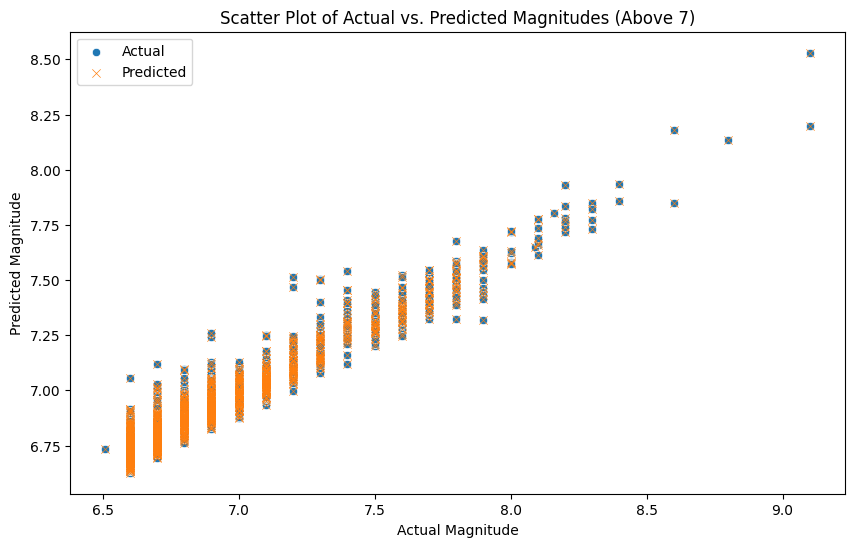

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have true values (y_true) and predicted values (y_pred) for the entire dataset
y_true = selected_earthquakes['Magnitude']
y_pred = rf_model.predict(selected_earthquakes[features])

# Set a threshold for magnitude (e.g., 7.0)
magnitude_threshold = 6.5

# Filter earthquakes above 7 for actual and predicted values
actual_above_6 = selected_earthquakes[y_true > magnitude_threshold]
predicted_above_6 = selected_earthquakes[y_pred > magnitude_threshold]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Magnitude', y=y_pred, data=actual_above_6, label='Actual', marker='o')
sns.scatterplot(x='Magnitude', y=y_pred[y_pred > magnitude_threshold], data=predicted_above_6, label='Predicted', marker='x')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Scatter Plot of Actual vs. Predicted Magnitudes (Above 7)')
plt.legend()
plt.show()


In [54]:
import pickle

# Save the model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)




In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd
from shapely.geometry import Point
import folium
import matplotlib.pyplot as plt
from datetime import timedelta
df['Date'] = pd.to_datetime(df['Date'])

# Feature engineering: Create a DaysSinceStart column
df['DaysSinceStart'] = (df['Date'] - df['Date'].min()).dt.days

# Drop rows with NaN values in the 'Depth' column
df = df.dropna(subset=['Depth'])

# Define features and target variable
features = ['DaysSinceStart', 'Latitude', 'Longitude', 'Depth']
target = 'Magnitude'

# Filter earthquakes above a given magnitude
magnitude_threshold = 6.0
selected_earthquakes = df[df['Magnitude'] > magnitude_threshold]

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(selected_earthquakes[features], selected_earthquakes[target])

# Specify the number of days into the future for prediction
n_days = 30  # Adjust as needed

# Create a DataFrame for future predictions
future_dates = pd.date_range(df['Date'].max() + timedelta(days=1), periods=n_days, freq='D')
future_data = pd.DataFrame({
    'DaysSinceStart': (future_dates - df['Date'].min()).days,
    'Latitude': np.random.uniform(low=-90, high=90, size=n_days),  # Example random latitude
    'Longitude': np.random.uniform(low=-180, high=180, size=n_days),  # Example random longitude
    'Depth': np.random.uniform(low=0, high=700, size=n_days)  # Example random depth
})

# Predict future earthquake magnitudes
future_data['Magnitude'] = rf_model.predict(future_data[features])

# Create a GeoDataFrame for plotting on a map
geometry = [Point(lon, lat) for lon, lat in zip(future_data['Longitude'], future_data['Latitude'])]
gdf = gpd.GeoDataFrame(future_data, geometry=geometry)

# Function to generate and display a time series plot
def display_time_series_plot(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Magnitude'], marker='o')
    plt.title('Time Series Plot')
    plt.xlabel('Date')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Create an interactive map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=3)

# Add predicted earthquake locations to the map
for idx, row in gdf.iterrows():
    popup_content = f"Latitude: {row['Latitude']:.2f}<br>Longitude: {row['Longitude']:.2f}<br>Depth: {row['Depth']:.2f}<br>Magnitude: {row['Magnitude']:.2f}"

    # Add marker to the map with a custom popup
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color='red'),
        # Add a click event to display the time series plot
        onclick=f"display_time_series_plot({row.to_dict()})"
    ).add_to(m)

# Display the map in Colab
m



<ipython-input-53-e80ec9d52d60>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-53-e80ec9d52d60>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DaysSinceStart'] = (df['Date'] - df['Date'].min()).dt.days
